# Exploratory Data Analysis on Happy Cow

For this EDA, we will be using the `HK1227-XLS-ENG.xlsx` dataset or more popularly known as the `Happy Cow` dataset. The scope of this EDA will only be for `staff daily` and `staff weekly`. The goal is to discover product and marketing opportunities that could help Happy Cow expand their sales.

Note: Kindly navigate through the `Kernel` Tab above and click the `Restart & Run All` Option. This loads the conditional formatting found on the flavors tables on the latter part of this notebook.

<b>SLT Number: 11<b>


Members: Banquerigo, Del Carmen, Menorca, Yepes
    
<img src="happycow_img.png" width="800" height="340">    

Important description for `sheet 3` and `sheet 6`, `staff daily` and `staff weekly`:

1. `Weekday+Date+Year` = the total `revenue` of the `date`. For example: `Sat 30th Sep 2017`. The total revenue on `Saturday`, `September 30th`, `2017` for a particular product or item.

2. `Ice cream name` + `Staff` columns contain the `total daily revenue` of Ice cream sold to the `Staff`. E.g., `S. Caramel Staff` refers to the total daily revenue of Salted Caramel sold to the `Staff`. 

3. Customers can add `toppings` on the ice cream. Types include: `1 Topping`, `2 Topping`, and `3 Topping`.

4. There are two types of packages: serving in `scoop(s)` or serving in separated `tubs`. `Scoop(s)` types include: `Single Scoop`, `Double Scoop`, and `Triple Scoop`. Take note, a discount price is offered in `Double Scoop` and `Triple Scoop`.

5. `Tub` Ice Cream is charged at normal price, same as single scoop. 


Notes: Not all the ice creams are served on daily basis.

## I. Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.parser import parse
from matplotlib.dates import date2num

# Custom plot format
plt.rcParams['figure.figsize'] = 16,6
plt.rcParams['lines.linewidth'] = 3.5
plt.rcParams['figure.titlesize'] = 32

custom_sns_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme('notebook', style='ticks', font_scale=1.5, rc=custom_sns_params)
colors = ['#393357', '#FFD400', '#00A5D3', '#009A57', '#6E3476']
custom_palette = sns.blend_palette(colors, n_colors=8)
sns.set_palette(custom_palette)

custom_palette

[(0.2235294117647059, 0.2, 0.3411764705882353),
 (0.6620069204152249, 0.5565397923875433, 0.1485121107266436),
 (0.8549019607843137, 0.8046289888504422, 0.12006151480199924),
 (0.2901960784313725, 0.7005459438677433, 0.5873279507881584),
 (0.0, 0.6345405613225683, 0.6863360246059207),
 (0.0, 0.6101806997308727, 0.41173394848135336),
 (0.18777393310265283, 0.42980392156862746, 0.3940945790080738),
 (0.43137254901960786, 0.20392156862745098, 0.4627450980392157)]

### A. Raw data inspection

In total, the `Happy Cow` dataset has:

1 Dimension - `Product` (Date)

29 Measures - Includes the `20` `Flavors` and 9 `Store Products`

##### Flavors: 
`S. Caramel Staff`, `Mango Staff`, `Chocolate Staff`, `Pure Coconut Staff`, `Mint Choco Staff`, `Strawberry Staff`, `Chai Tea Staff`, `Hazelnut Staff`, `Green Tea Staff`, `Pina Colada Staff`, `Coffee Staff`, `Banana Staff`, `YY Sesame Staff`, `Vanilla Bean Staff`,`Cherry Alm Staff`, `Apricot Staff`, `Red Bean Staff`, `Lime Coconut Staff`, `Pistachio Staff`, `Ginger Staff`


##### Products: 
`Single Scoop Staff`, `Double Scoop Staff`, `Triple Scoop Staff`, `1 Topping Staff`, `3 Topping Staff`,`Waffle Cone Staff`, `Cus IC Sand Staff`, `Ice Cream Sand Staff`, `Tub Staff`

In [2]:
in_file = 'happycow_dailysales.xlsx'

df_daily_raw = pd.read_excel(in_file, sheet_name='staff daily')
df_weekly_raw = pd.read_excel(in_file, sheet_name='staff weekly')

df_daily_pivot = pd.read_csv('happycow_pivot_daily.csv').rename(columns = lambda x: x.replace('Staff', ''))
df_weekly_pivot = pd.read_csv('happycow_pivot_weekly.csv').rename(columns = lambda x: x.replace('Staff', ''))

In [3]:
"""
First column as the transaction date
Products (Ice Cream & Ice Cream Sandwiches) & Number of Scoops as columns
"""
# Incorrect column name: Product
# Unnecessary word in product name: Staff
df_daily_raw.head(3)

,Product,S. Caramel Staff,Mango Staff,Chocolate Staff,Pure Coconut Staff,Mint Choco Staff,Strawberry Staff,Waffle Cone Staff,Chai Tea Staff,Hezelnut Staff,...,Lime Coconut Staff,Pistachio Staff,Ginger Staff,1 Topping Staff,Cus IC Sand Staff,3 Topping Staff,Single Scoop Staff,Tub Staff,Triple Scoop Staff,Double Scoop Staff
0,Sat 1st Apr 2017,0.0,30.0,30.0,60.0,30.0,0.0,12.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Sun 2nd Apr 2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Mon 3rd Apr 2017,0.0,60.0,60.0,30.0,0.0,0.0,6.0,0.0,60.0,...,0,0,0,0,0,0,0,0,0,-15


In [4]:
"""
First column as the transaction week (Friday)
Products (Ice Cream & Ice Cream Sandwiches) & Number of Scoops as columns
"""
# Unnecessary columns: Unnamed, avenue without negative
# Unnecessary word in product name: Staff
# Blank rows at the end
df_weekly_raw.iloc[-15:-11]

,Week,S. Caramel Staff,Mango Staff,Chocolate Staff,Pure Coconut Staff,Mint Choco Staff,Strawberry Staff,Waffle Cone Staff,Chai Tea Staff,Hezelnut Staff,...,Ginger Staff,1 Topping Staff,Cus IC Sand Staff,3 Topping Staff,Single Scoop Staff,Tub Staff,Triple Scoop Staff,Double Scoop Staff,Unnamed: 30,avenue without negative
24,Fri 22nd Sep 2017,480.0,120.0,180.0,300.0,363.33333,186.66667,60.0,60.0,0.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,-60.0,480.0,2268.0
25,Fri 29th Sep 2017,240.0,120.0,330.0,120.0,150.00000,60.00000,54.0,30.0,90.0,...,0.0,0.0,0.0,8.0,0.0,0.0,0.0,-45.0,240.0,1607.0
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### B. Data Wrangling

1. Parsed the date with a standard format: `%Y-%m-%d`
2. Renamed misleading column names and removed extra whitespaces:
    `Product` to `date`
3. Dropped unnecessary columns:
    `Unnamed` & `avenue without negative`
4. Dropped empty rows
5. Unpivotted columns in both the daily and weekly data

In [5]:
df_daily_raw = (pd.read_excel(in_file, sheet_name='staff daily',
                         parse_dates=['Product'])
                  .rename(columns = lambda x: 'date' if x == 'Product' else x.strip()))

df_weekly_raw = (pd.read_excel(in_file, sheet_name='staff weekly',
                          parse_dates=['Week'], usecols=[i for i in range(30)])
                   .rename(columns = lambda x: x.lower() if x == 'Week' else x.strip())
                   .dropna(how='all', axis=0).dropna(how='any', axis=0))

df_daily_raw['weekday'] = df_daily_raw.date.dt.strftime('%a')
df_weekly_raw['weekday'] = df_weekly_raw.week.dt.strftime('%a')

df_daily = df_daily_raw.melt(id_vars=['date', 'weekday'],
                             var_name='prod_id', value_name='revenue_hkd').astype({'revenue_hkd': float})
df_weekly = df_weekly_raw.melt(id_vars=['week', 'weekday'],
                               var_name='prod_id', value_name='revenue_hkd').astype({'revenue_hkd': float})

### C. Variable Creation

1. Added new date information for both the daily and weekly data: `weekday`
2. Added new product-related information: `prod_group`, `product_name`, `discount_type`, and `special_event`

In [6]:
weekday_order = {'Sun': 0, 'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6}

"""
Adding new product-related columns
"""
toppings = ['1 Topping', '3 Topping']
prod_packages = ['Single Scoop', 'Tub', 'Triple Scoop', 'Double Scoop']
flavors_popular = ['Chocolate', 'Strawberry', 'Mint Choco', 'S. Caramel'] # consistent
flavors_fruity = ['Mango', 'Pure Coconut', 'Cherry Alm', 'Apricot',
                  'Lime Coconut', 'Pina Colada'] # summer
flavors_warming = ['Hazelnut',  'Ginger',  'Chai Tea', 'Green Tea',
                    'YY Sesame', 'Red Bean', 'Pistachio'] # winter

special_event_coup = ['-$5 LUSH COUPON ON $40', 'Asia Research Free Scoop', 'Building Promotion', \
                    'Free Scoop Grassroot', 'Gift Voucher Reg', 'LUSH FOOT POWDER', \
                    'Lush Shampoo Bar $60', 'Registration day $20', 'Staff Off -$2', \
                    'ZALORA $30 Spent Coupon', 'ZALORA Ecoupon Buy 1 Get 1 Scoop', 'ZALORA Ecoupon Buy 1 Get 1 Scoop']

all_prod = list(set(df_daily.prod_id.unique().tolist() + df_weekly.prod_id.unique().tolist()) - set(toppings) - set(prod_packages))
df_product_master = pd.DataFrame({'prod_id': all_prod})

# Clean up extra whitespaces and correct mispelled flavor names
df_product_master['product_name'] = df_product_master.prod_id.str.replace('Staff', '').str.strip()
df_product_master.replace({'product_name' : { 'Hezelnut' : 'Hazelnut', 'YY Seasame' : 'YY Sesame'}}, inplace=True)

# Add product categories and discount type
df_product_master.loc[df_product_master[df_product_master.product_name.isin(flavors_popular)].index, 'prod_group'] = 'Popular'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(flavors_fruity)].index, 'prod_group'] = 'Fruity'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(flavors_warming)].index, 'prod_group'] = 'Warming'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(toppings)].index, 'prod_group'] = 'Topping'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(prod_packages)].index, 'prod_group'] = 'Package'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(prod_packages[:2])].index, 'discount_type'] = 'No Discount'
df_product_master.loc[df_product_master[df_product_master.product_name.isin(prod_packages[2:])].index, 'discount_type'] = 'Discounted'

# Add the special event tagging if it exists
coup_filter = df_product_master[df_product_master.product_name.isin(special_event_coup)]
if len(coup_filter) > 0:
    df_product_master.loc[coup_filter.index, 'special_event'] = 1
    df_product_master.special_event.fillna(float(0), inplace=True)

### D. Transformed dataset

In [7]:
df_daily = df_daily.merge(df_product_master, on='prod_id', how='left').reset_index(drop=True)
df_weekly = df_weekly.merge(df_product_master, on='prod_id', how='left').reset_index(drop=True)

In [8]:
df_daily.head()

,date,weekday,prod_id,revenue_hkd,product_name,prod_group,discount_type
0,2017-04-01,Sat,S. Caramel Staff,0.0,S. Caramel,Popular,NaN
1,2017-04-02,Sun,S. Caramel Staff,0.0,S. Caramel,Popular,NaN
2,2017-04-03,Mon,S. Caramel Staff,0.0,S. Caramel,Popular,NaN
3,2017-04-04,Tue,S. Caramel Staff,0.0,S. Caramel,Popular,NaN
4,2017-04-05,Wed,S. Caramel Staff,60.0,S. Caramel,Popular,NaN


In [9]:
df_weekly.head()

,week,weekday,prod_id,revenue_hkd,product_name,prod_group,discount_type
0,2017-04-07,Fri,S. Caramel Staff,150.0,S. Caramel,Popular,NaN
1,2017-04-14,Fri,S. Caramel Staff,180.0,S. Caramel,Popular,NaN
2,2017-04-21,Fri,S. Caramel Staff,90.0,S. Caramel,Popular,NaN
3,2017-04-28,Fri,S. Caramel Staff,120.0,S. Caramel,Popular,NaN
4,2017-05-05,Fri,S. Caramel Staff,120.0,S. Caramel,Popular,NaN


## II. Quick Statistics

1. Shape of the dataframes
2. Data types
3. Period observed
4. Descriptors on the distribution

In [10]:
df_daily.shape, df_weekly.shape

((5307, 7), (754, 7))

In [11]:
df_daily.date.min(), df_daily.date.max(), df_weekly.week.min(), df_weekly.week.max()

(Timestamp('2017-04-01 00:00:00'),
 Timestamp('2017-09-30 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-09-29 00:00:00'))

In [12]:
df_daily.dtypes

date             datetime64[ns]
weekday                  object
prod_id                  object
revenue_hkd             float64
product_name             object
prod_group               object
discount_type            object
dtype: object

In [13]:
df_weekly.dtypes

week             datetime64[ns]
weekday                  object
prod_id                  object
revenue_hkd             float64
product_name             object
prod_group               object
discount_type            object
dtype: object

In [14]:
df_daily.describe()

,revenue_hkd
count,5307.000000
mean,13.909365
std,36.538644
min,-120.000000
25%,0.000000
50%,0.000000
75%,6.000000
max,390.000000


In [15]:
df_weekly.describe()

,revenue_hkd
count,754.000000
mean,97.832891
std,169.342333
min,-390.000000
25%,0.000000
50%,30.000000
75%,150.000000
max,1258.333330


## III. Findings

### A. Trends and Seasonality

#### 1. How does revenue change over time?
Revenue pattern cycles every 5 days

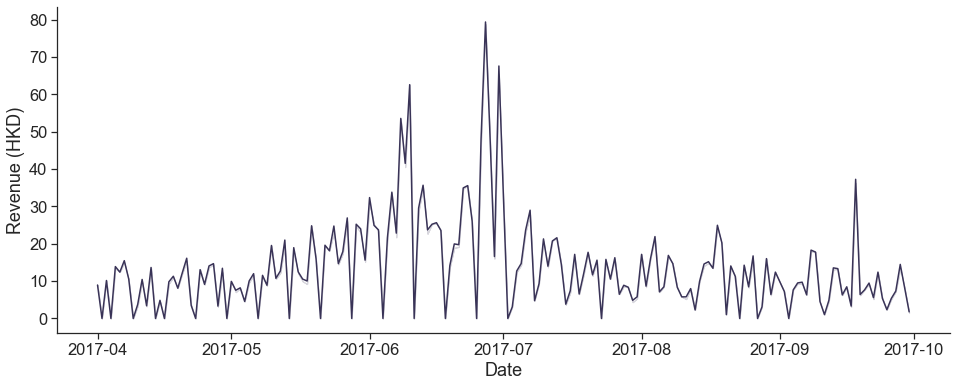

In [16]:
ax = sns.lineplot(data=df_daily, x='date', y='revenue_hkd',
             markers=True, dashes=False, ci=False)
ax.set(xlabel='Date', ylabel='Revenue (HKD)')
# plt.title('Daily Revenue')
# plt.legend(loc='best')
plt.show()

#### 2. Does school calendar have an effect to the sales?
Daily revenue significantly increased during school break (1st week of June) to Summer semester (July)

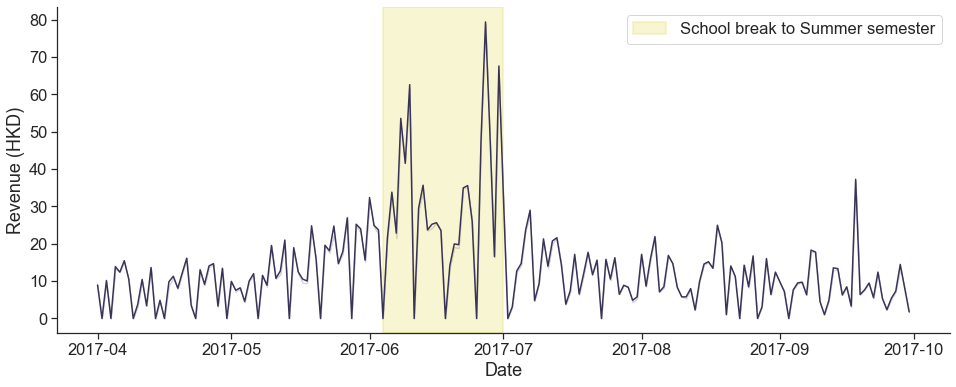

In [17]:
ax = sns.lineplot(data=df_daily, x='date', y='revenue_hkd',
             markers=True, dashes=False, ci=False)
ax.set(xlabel='Date', ylabel='Revenue (HKD)')
ax.axvspan(date2num(datetime(2017,6,4)), date2num(datetime(2017,7,1)), 
           label='School break to Summer semester', color=custom_palette.as_hex()[2], alpha=0.2,
           lw=2)
# plt.title('Daily Revenue')
plt.legend(loc='best')
plt.show()

#### 3. How does sales differ by day of the week?
Friday records the highest average revenue among days of the week, followed by Thursday

Sales are the lowest during Sundays

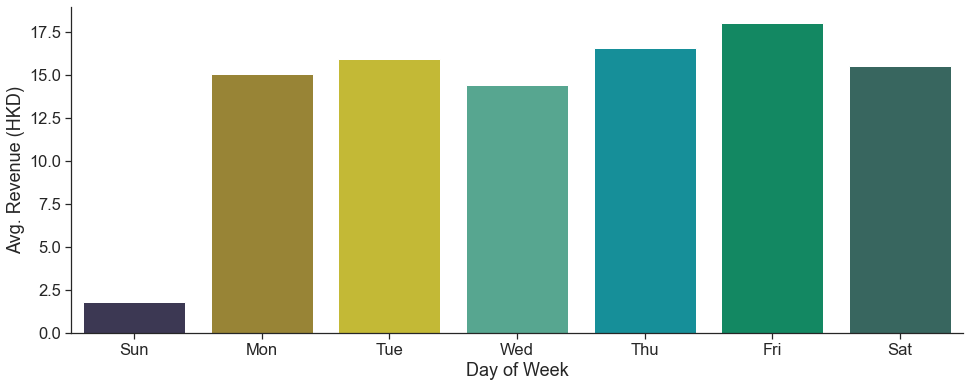

In [18]:
df_plt = (df_daily.groupby('weekday').revenue_hkd.mean().reset_index(name='avg_revenue_hkd')
                  .sort_values(by='weekday', key=lambda x: x.map(weekday_order)))
ax = sns.barplot(data=df_plt, x='weekday', y='avg_revenue_hkd', palette=custom_palette)
ax.set(xlabel='Day of Week', ylabel='Avg. Revenue (HKD)')
# plt.title('Avg. Revenue by Day of Week')
plt.show()

### B. Product & Marketing

#### 1. How does season affect sales of different flavors?
Popular flavors (`Chocolate`, `Mint Choco`, `Strawberry`, `S. Caramel`) consistently sells the most across time.

Perceived seasonality of the flavors (e.g. Fruity flavors are popular during summer vs. Warming flavors)
is not reflected to the monthly sales as the trend stayed the same for 5 months.

Staff customers are also not receptive to special event promos as none of them redeemed a coupon.

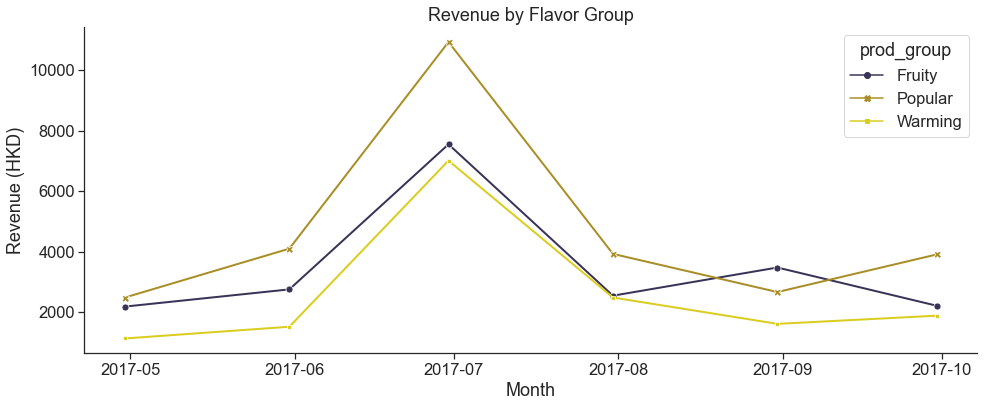

In [19]:
# Sales by prod group over time: Monthly
"""
Popular flavors consistently sells the most across time
Fruity flavors surpassed sales of Popular flavors in September 2017
"""
df_plt = (df_weekly[df_weekly.prod_group.isin(['Popular', 'Fruity', 'Warming'])]
                .groupby([pd.Grouper(key='week', freq='M'), 'prod_group'])
                .revenue_hkd.sum()
                .reset_index(name='revenue_hkd'))
ax = sns.lineplot(data=df_plt, x='week', y='revenue_hkd', hue='prod_group',
             style='prod_group', ci=None, markers=True, dashes=False, lw=2, markersize=7)
ax.set(xlabel='Month', ylabel='Revenue (HKD)')
# plt.legend(title=None, loc='best')
plt.title('Revenue by Flavor Group')
plt.show()

#### 2. Do toppings contribute significantly to the revenue?

Overall, toppings are also not generating much revenue as only 2 tiers (1 & 3 Toppings) are noticed by customers

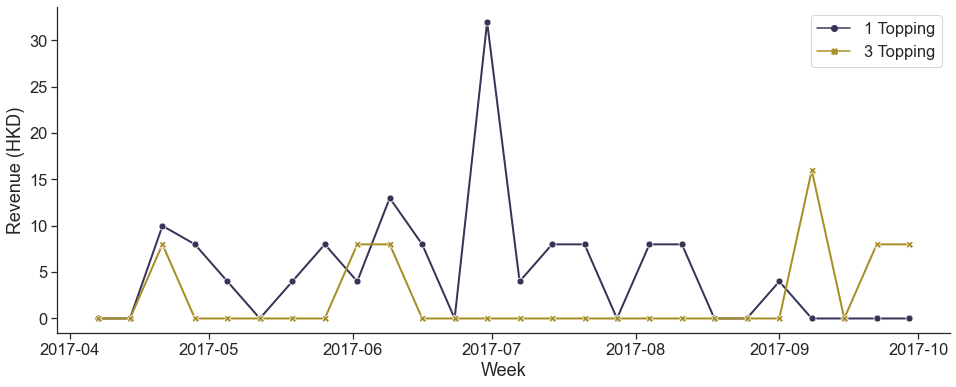

In [20]:
# Sales by no. of toppings over time
"""
1 is the most preferred number of toppings of the staff
Boost in sales of 3 toppings was seen from 2nd week of Sept to Oct 2017,
which is the first month of the school year
"""

df_plt = df_weekly[df_weekly.prod_group.isin(['Topping'])]
ax = sns.lineplot(data=df_plt, x='week', y='revenue_hkd', hue='product_name',
             style='product_name', ci=None, markers=True, dashes=False, lw=2, markersize=7)
ax.set(xlabel='Week', ylabel='Revenue (HKD)')
# plt.title('Revenue by Number of Toppings')
plt.legend(title=None, loc='best')
plt.show()

#### 3. How are discounted items received by customers?

Among the discounted ice cream, double-Scooped more popular among staff customers

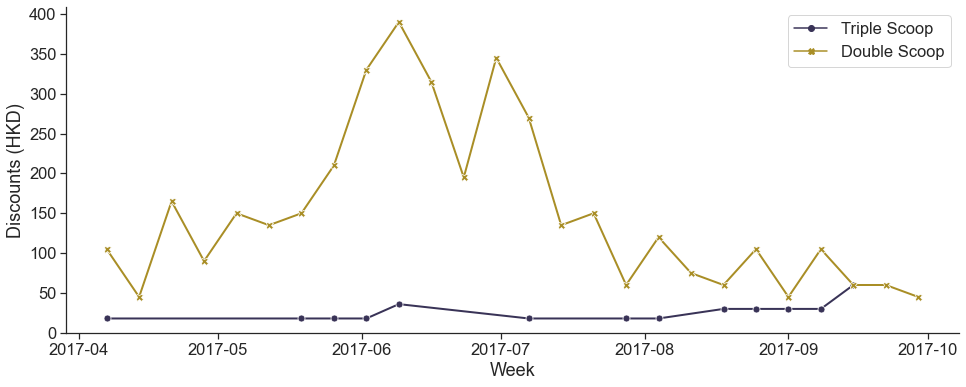

In [21]:
# Sales by package over time
df_plt = df_weekly[(df_weekly.prod_group.isin(['Package'])) & (df_weekly.revenue_hkd != float(0))]
ax = sns.lineplot(data=df_plt, x='week', y=df_plt.revenue_hkd.abs(), hue='product_name',
             style='product_name', ci=None, markers=True, dashes=False, lw=2, markersize=7)
ax.set(xlabel='Week', ylabel='Discounts (HKD)')
# plt.title('Discounts by Number of Scoops')
plt.legend(title=None, loc='best')
plt.show()

#### 4. Is there a better way to group the flavors? When to introduce the flavors based on this group?

Since the sales of Happy Cow's retail store from the staff mostly depends on the school calendar, parts of a school year can be considered as the "season" and group best-selling product during the period accordingly.

In [22]:
df_daily_pivot.iloc[:,5:25].mean().to_frame().T.rename(index={0:'Mean'})

,S. Caramel,Mango,Chocolate,Pure Coconut,Mint Choco,Strawberry,Chai Tea,Hazelnut,Green Tea,Pina Colada,Coffee,Banana,YY Sesame,Vanilla Bean,Cherry Alm,Apricot,Red Bean,Lime Coconut,Pistachio,Ginger
Mean,55.88094,43.880278,37.507534,31.306508,30.288955,29.654413,21.78465,18.012088,16.702683,15.23431,14.074019,13.913727,12.620467,12.422173,9.669647,7.868852,7.334492,5.409836,4.754098,4.590164


The six (6) most popular flavors are the following:

1. `S. Caramel Staff`
2. `Mango Staff`
3. `Chocolate Staff`
4. `Pure Coconut Staff`
5. `Mint Choco Staff`
6. `Strawberry Staff`

The six (6) least popular flavors are categorized to `Seasonal Flavors`:
1. `Ginger`
2. `Pistachio`
3. `Lime Coconut`
4. `Red Bean`
5. `Apricot`
6. `Cherry Almond`

The eight (8) flavors found in the middle of the pack will be categorized to `Special Flavors`, which will then be further reclassified to `Cooling` and `Heaty` Flavors:

Cooling Flavors:
1. `Chai Tea`
2. `Green Tea`
3. `Banana`
4.` Yin Yang Sesame`

Heaty Flavors:
1. `Hazelnut`
2. `Pina Colada`
3. `Coffee`
4. `Vanilla Bean`

##### Popular Flavors by Days of the Week

In [23]:
pop_df = df_daily_pivot.groupby('Day of the Week').mean().reindex(['Sunday',
                                                            'Monday',
                                                            'Tuesday',
                                                            'Wednesday',
                                                            'Thursday',
                                                            'Friday',
                                                            'Saturday'])
pop_df = pop_df.iloc[1:,1:7].T
pop_df = pop_df.style.highlight_min(color = 'coral')
pop_df

Day of the Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
S. Caramel,71.474359,62.226107,57.692308,60.000000,76.153846,57.777778
Mango,35.705128,46.054778,44.935898,64.461538,53.076923,57.777778
Chocolate,42.628205,35.751748,38.076923,51.769231,41.538462,50.000000
Pure Coconut,36.923077,31.118881,25.384615,35.769231,45.000000,41.111111
Mint Choco,38.205128,33.444056,28.846154,30.000000,44.615385,33.333333
Strawberry,36.987180,28.811188,18.461538,28.692308,55.384615,35.555556


These are the `Popular` Flavors of Happy Cow. \
The values highlighted in `orange` are the worst performaing flavors per day of the week.

Observations:

1. `Mango` tends to be bought the least by staff during `Monday`.
2. `Strawberry` tends to be bought the least by staff during `Tuesday`, `Wednesday`, and `Thursday`
3. `Chocolate` tends to be bought the least by staff during `Friday`.
4. `Mint Choco` tends to be bought the least by staff during `Saturday`.

##### Seasonal Flavors by Segments of the School Calendar / Semester

In [24]:
mean_per_month = df_daily_pivot.iloc[:,0:25].groupby(['Segment', 'Month']).mean()
mean_per_month = mean_per_month.reindex([(  'First Teaching Month', 'September'),
                                         (   'Last Teaching Month',     'April'),
                                         (      'Assessment Month',       'May'),
                                         (           'Break Month',      'June'),
                                         ( 'First Summer Sem Month',    'July'),
                                         ( 'Last Summer Sem Month',    'August')])

mean_per_month['Year'] = mean_per_month['Year'].astype(int)
mean_per_month = mean_per_month.iloc[:,15:21].T.style.highlight_quantile(axis=0, q_left=0.7, color='lightgreen')
mean_per_month

Segment,First Teaching Month,Last Teaching Month,Assessment Month,Break Month,First Summer Sem Month,Last Summer Sem Month
Month,September,April,May,June,July,August
Cherry Alm,8.000000,1.000000,14.516129,5.984848,14.516129,13.548387
Apricot,6.000000,0.000000,9.677419,28.000000,3.870968,0.000000
Red Bean,4.000000,2.000000,0.913978,32.795959,3.870968,0.967742
Lime Coconut,3.000000,0.000000,0.000000,0.000000,12.580645,16.451613
Pistachio,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000
Ginger,0.000000,0.000000,13.548387,0.000000,9.677419,3.870968


These are the `Seasonal` Flavors of Happy Cow. \
The values highlighted in `green` are the top 2 best performaing seasonal flavors per Month of the Semester.

Observations:

1. `Red Bean` and `Pistachio` tends to be bought the most by staff during Term Breaks.
2. `Cherry Alm`, `Apricot`, and `Red Bean` are popular among staff during `Regular Semester`, which is comprised of `Teaching Months` and `Assessment Month`.
3. During the `Summer Semester`, the popular seasonal flavors are `Cherry Alm`, and `Lime Coconut`.

##### Special Flavors by Weeks of the Month per Semester Catgorized Between Cooling and Heaty Flavors

##### For Regular Semester Heaty Flavors:

In [25]:
# Regular Semester Heaty Flavors
heaty_list = [8, 10, 11, 14]
df_sem = df_weekly_pivot.loc[(df_weekly_pivot['Month'] != 'July') & (df_weekly_pivot['Month'] != 'August')]
df_sem = df_sem.groupby(['WeekInMonth']).mean().iloc[:,heaty_list].T.style.highlight_max(color='lightblue')
df_sem

WeekInMonth,1,2,3,4,5
Hazelnut,90.000000,22.500000,172.083332,112.500000,169.292930
Pina Colada,120.000000,44.583332,60.000000,97.500000,229.848483
Coffee,60.000000,44.000000,165.000000,97.500000,49.848483
Vanilla Bean,40.000000,37.500000,30.000000,96.250000,309.419190


##### For Regular Semester Cooling Flavors:

In [26]:
# Regular Semester Cooling Flavors
cooling_list = [7, 9, 12, 13]
df_sem = df_weekly_pivot.loc[(df_weekly_pivot['Month'] != 'July') & (df_weekly_pivot['Month'] != 'August')]
df_sem = df_sem.groupby(['WeekInMonth']).mean().iloc[:,cooling_list].T.style.highlight_max(color='lightblue')
df_sem

WeekInMonth,1,2,3,4,5
Chai Tea,210.000000,112.500000,149.375000,217.500000,139.696967
Green Tea,120.000000,180.000000,112.083332,67.500000,219.419190
Banana,120.000000,82.083332,82.083332,60.000000,179.848483
YY Sesame,70.000000,112.500000,90.000000,30.000000,169.848483


These are the `Special` Flavors of Happy Cow. \
The values highlighted in `blue` are the top best performaing special flavors per Week of the Month for the `Regular Semester` categorized between `Cooling` and `Heaty` Flavors.

Observations for the `Cooling` flavors category:
1. Throughout the semester, `Chai Tea` and `Green Tea` is the most sought out flavor among the `Cooling` flavors category.
2. `Green Tea` flavor stands out during `Week 2` and `Week 5` of the Month.


Observations for the `Heaty` flavors category:
1. From `Week 1` to `Week 2`, it is evident that `Pina Colada` is the most sought out special flavor.
2. From `Week 3` to `Week 4`, it changes to `Hazelnut`.
3. `Vanila Bean` Flavor seems to standout during `Week 5`.

##### For Summer Semester Heaty Flavors:

In [27]:
# Summer Semester Heaty Flavors
heaty_list = [8, 10, 11, 14]
df_sem = df_weekly_pivot.loc[(df_weekly_pivot['Month'] == 'July') | (df_weekly_pivot['Month'] == 'August')]
df_sem = df_sem.groupby(['WeekInMonth']).mean().iloc[:,heaty_list].T.style.highlight_max(color='pink')
df_sem

WeekInMonth,1,2,3,4,5
Hazelnut,30.000000,225.000000,315.000000,75.000000,30.000000
Pina Colada,210.000000,120.000000,30.000000,165.000000,90.000000
Coffee,60.000000,75.000000,225.000000,135.000000,90.000000
Vanilla Bean,120.000000,75.000000,60.000000,75.000000,30.000000


##### For Summer Semester Cooling Flavors:

In [28]:
# Summer Semester Cooling Flavors
cooling_list = [7, 9, 12, 13]
df_sem = df_weekly_pivot.loc[(df_weekly_pivot['Month'] == 'July') | (df_weekly_pivot['Month'] == 'August')]
df_sem = df_sem.groupby(['WeekInMonth']).mean().iloc[:,cooling_list].T.style.highlight_max(color='pink')
df_sem

WeekInMonth,1,2,3,4,5
Chai Tea,180.000000,60.000000,105.000000,150.000000,210.000000
Green Tea,60.000000,45.000000,180.000000,15.000000,30.000000
Banana,0.000000,195.000000,60.000000,75.000000,90.000000
YY Sesame,60.000000,135.000000,90.000000,30.000000,90.000000


These are the `Special` Flavors of Happy Cow. \
The values highlighted in `pink` are the top best performaing special flavors per Week of the Month for the `Summer Semester` categorized between `Cooling` and `Heaty` Flavors.

Observations for the `Cooling` flavors category:
1. Throughout the semester, `Chai Tea`, `Green Tea`, and `Banana` is the most sought out flavor among the `Cooling` flavors category.
2. `Chai Tea` flavor is the most sought out during `Week 1`, `Week 4`, and `Week 5`.
3. `Green Tea` flavor stands out during `Week 3` of the Month.
4. `Banana` flavor is specially sought out during `Week 2`.


Observations for the `Heaty` flavors category:
1. For `Week 1`, it is evident that `Pina Colada` is the most sought out special flavor.
2. From `Week 2` to `Week 3`, it changes to `Hazelnut`.
4. For `Week 4`, it shifts back to `Pina Colada`.
3. For `Week 5`, there seems to be a tie between `Pina Colada` and `Coffee`.

## IV. Recommendations


#### A. Trends & Seasonality

1. Closing the store during Sundays may be considered since sales during the day is low. Happy Cow can focus their operational resources on extending hours during peak days such as Fridays and Thursdays.

2. Since the perceived seasonality of flavors is not apparent in the sales trend, Happy Cow can introduce new product categories (e.g. Popular, Special, and Seasonal) and release schedule that better match the demand in the upcoming seasons. (e.g. Sell warming flavors from October onwards since it's fall to winter season.)

#### B. Product & Marketing

1. Assess if Tub ice creams should be discontinued since it does not generate revenue but introduces costs.
2. There is almost 0 revenue for toppings, if it is possible, reduce the price to increase the volume of sales.
3. Reduce the price for CUS IC Sand or discontinue the product. May focus more on products that are selling well such as Waffle Cone and Ice Cream Sandwich.

#### C. The Retail Store & Possible Investment

1. Redesign the store to invite people to stay and enjoy their ice cream by introducing more sitting capacity and even removing the piano altogether.

2. Upgrade the freezer to display up to 16 flavors at a time instead of 8. Since the store keeps 16 flavors in the inventory at a time, it would be good to display all of them to introduce more choices to the customers.

#### D. Flavors
1. Regroup the flavors to Popular, Special, and Seasonal Flavors.
2. Determine a baseline mean value to determine the Popular Flavors from Seasonal Flavors.
3. Discontinue `Coffee` Flavor as it is not a popular flavor at any given point. It is only sought out during week 5 of the Summer Semester.
4. Discontinue `Apricot`, `Pistachio`, and `Ginger` flavor as they are rarely sought out by staff. These flavors can be swapped out with new flavors that they can introduce.
5. Discontinue `Vanilla Bean` Flavor, not sought out.

6. There are flavors that are popular based on what day of the week it is. Since the display freezer is a store bottleneck as it can only display 8 flavors at a time. Example, Monday, Display top 5 popular flavors based on mean revenue of that day of the week, then 1 seasonal flavor of the month, then 2 special flavors, one cooling and one heaty, cycled weekly. Scale this model based on the accomodation that the freezer can handle.
3. Determine the `minimum inventory` for every flavor. Either use `minimum inventory formula` or use a `numerical formula` to anticipate the next month's minimum inventory that takes into account the `gradient`, `trend`, `max`, `min`, `std`,`mean` of the past `three or six moving months`. You can actually the daily quantity sold by dividing the revenue data by its price.